In [1]:
from mdagent import MDAgent

In [2]:
prompt1 = "Simulate PDB ID 1MBN at two different temperatures: 300 K and 400 K for 1 ns each. Plot the RMSD of both over time and compare the final secondary structures at the end of the simulations. Get information about this protein, such as the number of residues and chains, etc."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [3]:
agent.run(prompt1)

Thought: To simulate PDB ID 1MBN at two different temperatures and compare the results, I will need to:

1. Download the PDB file for 1MBN
2. Summarize the protein structure to get information like number of residues and chains
3. Set up and run simulations at 300K and 400K 
4. Compute the RMSD over time for both trajectories and plot them
5. Compute the secondary structure (DSSP) at the end of each simulation and compare

I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```

PDB file found with this ID: 1MBN
Thought: Now that I have the PDB file downloaded, I will summarize the protein structure to get information like the number of residues and chains.

Action:
```
{
  "action": "SummarizeProteinStructure",
  "action_input": {
    "traj_file": "1MBN_225805"
  }
}
```Thought: Now that I have summarized the protein structure, I will set up and run simulations at 300K and 400K for 1 ns each.

Action:
```
{
  "action": "

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_225805: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_225805
 1MBN_225853: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_225904: Initial positions for simulation sim0_225904
 sim0_225904: Basic Simulation of Protein 1MBN_225853
 rec0_225905: Simulation trajectory for protein 1MBN_225853 and simulation sim0_225904
 rec1_225905: Simulation state log for protein 1MBN_225853 and simulation sim0_225904
 rec2_225905: Simulation pdb frames for protein 1MBN_225853 and simulation sim0_225904
 top_sim0_002014: Initial positions for simulation sim0_002014
 sim0_002014: Basic Simulation of Protein 1MBN_225853
 rec0_002015: Simulation trajectory for protein 1MBN_225853 and simulation sim0_002014
 rec1_002015: Simulation state log for protein 1MBN_225853 and simulation sim0_002014
 rec2_002015: Simulation pdb frames for protein 1MBN_2258

In [5]:
import re
import os
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)

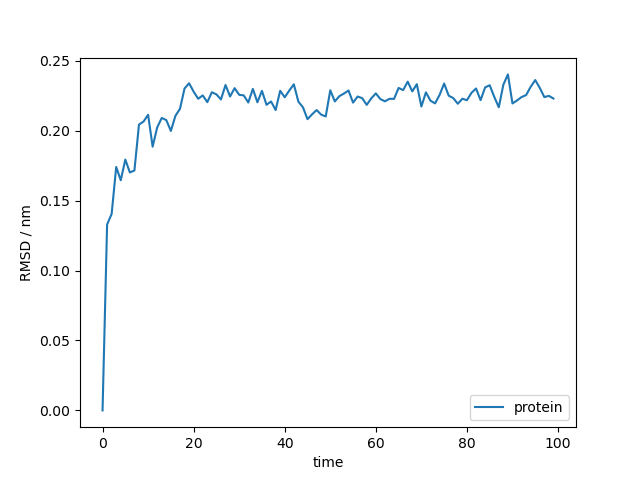

In [6]:
file_id1 = matches[0]
path1 = registry.get_mapped_path(file_id1)
assert os.path.exists(path1)
Image(filename=path1)

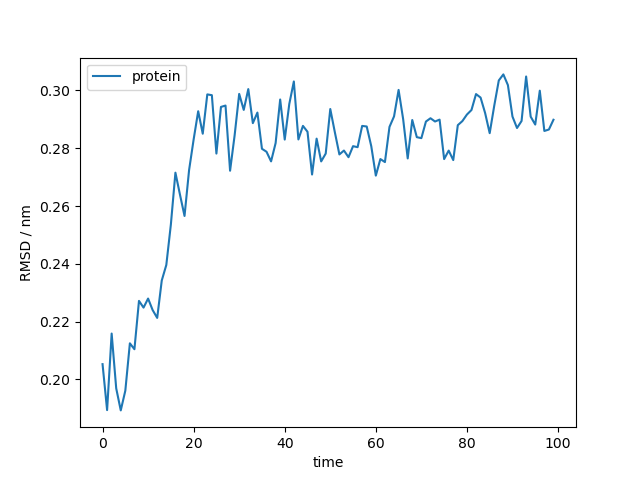

In [7]:
file_id2 = matches[1]
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path2)
Image(filename=path2)

In [11]:
path3 = registry.get_mapped_path("top_sim0_225904")
assert os.path.exists(path3)

path4 = registry.get_mapped_path("top_sim0_002014")
assert os.path.exists(path4)

In [12]:
#secondary structure
import mdtraj as md

traj = md.load(path3)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  115
Number of residues in coils:  38


In [13]:
traj = md.load(path4)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  115
Number of residues in coils:  38
